# Running an inference for images containing glare

First, import necessary dependencies.

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.preprocessing import image

Next, load the model.

In [2]:
glareCNN = tf.keras.models.load_model('model/glare/glare_detect.h5')

Thereafter, defining two helper functions. 
1. infer() runs the inference on a given image path. 
2. pred() converts the CNN output to meaningful prediction.  

These helper functions will assist in running inferences for this model. 

In [3]:
def infer(img_path,img_name):
    test_image1 = image.load_img(str(img_path)+str(img_name), target_size = (64,64)) #reading an image from the given path and scaling to 64x64
    test_image2 = image.img_to_array(test_image1) #convert PIL image to array
    test_image2 = np.expand_dims(test_image2, axis = 0) #expand image dimensions to make it compatible with CNN input
    result = glareCNN.predict(test_image2/255) #Values in the array scaled from [0,255] -> [0,1]
    return test_image1,result #returning image for viewing and the associated CNN output

In [4]:
def pred(score):
    pred_class = "" #defining variable to store predictions
    if score[0][0] <0.5: #CNN model refers to 0 as "glare" and 1 as "not glare", applying a threshold for both cases.
        pred_class = "Glare" #values less than 0.5
    else:
        pred_class = "Not Glare" #values greater than 0.5
    return pred_class

Defining the image path and name

In [5]:
img_path = 'images//glare//'
img = 'im1.jpg'

Helper function called to run the inference

In [6]:
image_calc,result = infer(img_path,img)

In [7]:
classification = pred(result)

The image on which the inference was run on

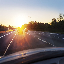

In [8]:
image_calc

In [9]:
print(result, classification)

[[0.10997206]] Glare


Now, you can run inferences using the pretrained models via helper functions.  
Another example

In [10]:
img_path = 'images//glare//'
img = 'im2.jpg'

In [11]:
image_calc,result = infer(img_path,img)
classification = pred(result)

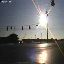

In [12]:
image_calc

In [13]:
print(result, classification)

[[0.13750693]] Glare


Let's check the same for images not containing glare.

In [14]:
img_path = 'images//not_glare//'
img = 'im1.jpg'

In [15]:
image_calc,result = infer(img_path,img)
classification = pred(result)

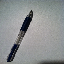

In [16]:
image_calc

In [17]:
print(result, classification)

[[0.98032624]] Not Glare


In this case, let's use a brightly lit image not containing glare. This shows that the model generalizes well for scenes that are well lit.

In [18]:
img_path = 'images//not_glare//'
img = 'im2.jpg'

In [19]:
image_calc,result = infer(img_path,img)
classification = pred(result)

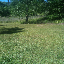

In [20]:
image_calc

In [21]:
print(result, classification)

[[0.9450362]] Not Glare
